# PyTorch

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [28]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx

--2017-11-01 11:38:18--  http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76189 (74K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘ENB2012_data.xlsx’

ENB2012_data.xlsx   100%[===================>]  74.40K  --.-KB/s    in 0.1s    

2017-11-01 11:38:18 (629 KB/s) - ‘ENB2012_data.xlsx’ saved [76189/76189]



In [58]:
!ls

ENB2012_data.xlsx  forestfires.names  Untitled.ipynb
forestfires.csv    Untitled1.ipynb


In [61]:
data = pd.read_csv('forestfires.csv').as_matrix()

In [62]:
dataD = np.delete(np.delete(data,2,axis=1), 2, axis=1).astype(np.dtype(float))

In [66]:
xn = dataD[:,:-2]
m,s = np.mean(xn,axis=0), np.std(xn,axis=0)
xn -= m
xn /= s

In [67]:
yn = dataD[:,-2]
m,s = np.mean(yn,axis=0), np.std(yn,axis=0)
yn -= m
yn /= s

In [91]:
x = Variable(torch.from_numpy(xn).type(torch.FloatTensor))
y = Variable(torch.from_numpy(yn).type(torch.FloatTensor),requires_grad=False)

In [92]:
class Model(torch.nn.Module):
    
    def __init__(self,n,h,o):
        super(Model, self).__init__()
        self.mods = torch.nn.ModuleList([])
        self.mods.append(torch.nn.Linear(n, h))
        self.mods.append(torch.nn.ReLU())
        self.mods.append(torch.nn.Tanh())
        self.mods.append(torch.nn.ReLU())
        self.mods.append(torch.nn.Tanh())
        self.mods.append(torch.nn.ReLU())
        self.mods.append(torch.nn.Linear(h,o))
        
    def forward(self, x):
        #return self.fc(x) # it was just x there
        for module in self.mods:
            x = module(x)
        return x

Trained in 9.658855676651001 seconds


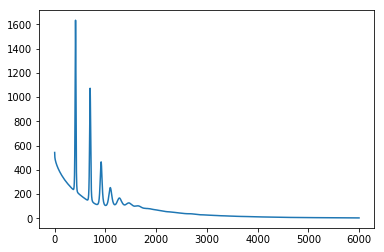

In [95]:
# Code in file nn/two_layer_net_module.py
import torch
import time
tstart = time.time()
from torch.autograd import Variable

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
H, D_out = 500, 1
use_cuda = True

# Construct our model by instantiating the class defined above
model = Model(x.size()[1],H,D_out)
if torch.cuda.is_available() and use_cuda:
    model = model.cuda()
    x = x.type(torch.cuda.FloatTensor)
    y = y.type(torch.cuda.FloatTensor)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
lossTrace = []
for t in range(6000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    lossTrace.append(loss.data[0])
    #print(t, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print('Trained in {} seconds'.format(time.time() - tstart))
plt.plot(lossTrace)


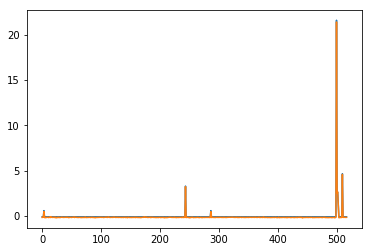

In [96]:
plt.plot(y.data.cpu().numpy())
plt.plot(model(x).data.cpu().numpy())